### plotnine

A Grammar of Graphics for Python

https://plotnine.readthedocs.io/en/stable/index.html

<b><font color="red">plotnine</font></b> is an implementation of a grammar of graphics in Python, it is based on <b><font color="red">ggplot2</font></b> - graphics library for "R"

https://ggplot2.tidyverse.org/

The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot.

Plotting with a grammar is powerful, it makes custom (and otherwise complex) plots easy to think about and then create, while the simple plots remain simple.

Cheatsheet - https://github.com/rstudio/cheatsheets/blob/main/data-visualization-2.1.pdf

Gallery - https://plotnine.readthedocs.io/en/stable/gallery.html


In [1]:
# !pip install plotnine

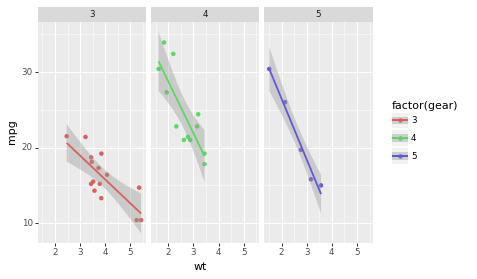

<ggplot: (8785776694122)>

In [2]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars

(ggplot( mtcars, 
         aes('wt', 'mpg', color='factor(gear)')
       )
       + geom_point()
       + stat_smooth(method='lm')
       + facet_wrap('~gear')
)

In [3]:
import pandas as pd
import numpy as np

from plotnine import *

%matplotlib inline

In [4]:
df = pd.DataFrame({
    'variable': ['gender', 'gender', 'age', 'age', 'age', 'income', 'income', 'income', 'income'],
    'category': ['Female', 'Male', '1-24', '25-54', '55+', 'Lo', 'Lo-Med', 'Med', 'High'],
    'value': [60, 40, 50, 30, 20, 10, 25, 25, 40],
})
df['variable'] = pd.Categorical(df['variable'], categories=['gender', 'age', 'income'])
df['category'] = pd.Categorical(df['category'], categories=df['category'])

df

,variable,category,value
0,gender,Female,60
1,gender,Male,40
2,age,1-24,50
3,age,25-54,30
4,age,55+,20
5,income,Lo,10
6,income,Lo-Med,25
7,income,Med,25
8,income,High,40


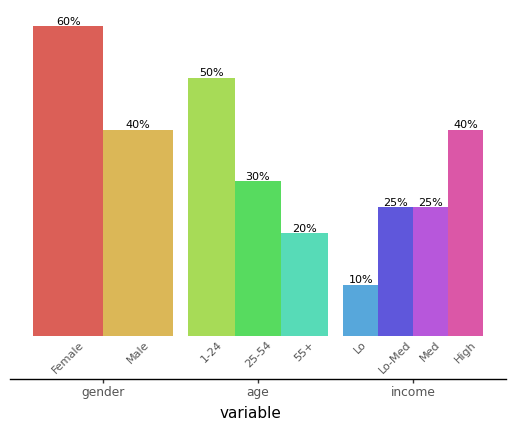

<ggplot: (8785741518969)>

In [5]:
dodge_text = position_dodge(width=0.9)
ccolor = '#555555'

# Gallery Plot

(ggplot(df, aes(x='variable', y='value', fill='category'))
 + geom_col(stat='identity', position='dodge', show_legend=False)
 + geom_text(aes(y=-.5, label='category'),
             position=dodge_text,
             color=ccolor, size=8, angle=45, va='top')              # modified
 + geom_text(aes(label='value'),
             position=dodge_text,
             size=8, va='bottom', format_string='{}%')
 + lims(y=(-5, 60))
 + theme(panel_background=element_rect(fill='white'),               # new
         axis_title_y=element_blank(),
         axis_line_x=element_line(color='black'),
         axis_line_y=element_blank(),
         axis_text_y=element_blank(),
         axis_text_x=element_text(color=ccolor),
         axis_ticks_major_y=element_blank(),
         panel_grid=element_blank(),
         panel_border=element_blank())
)

In [6]:
# https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/index.html
# https://datacarpentry.org/python-ecology-lesson/setup.html#required-python-packages

%matplotlib inline
import plotnine as p9

import pandas as pd

surveys_complete = pd.read_csv('https://ndownloader.figshare.com/files/10717177')
surveys_complete = surveys_complete.dropna()

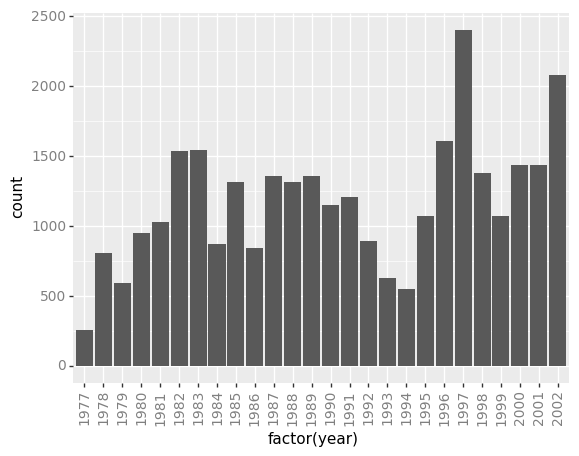

<ggplot: (8785808883601)>

In [7]:
my_custom_theme = p9.theme(axis_text_x = p9.element_text(color="grey", size=10,
                                                         angle=90, hjust=.5),
                           axis_text_y = p9.element_text(color="grey", size=10))
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + my_custom_theme
)

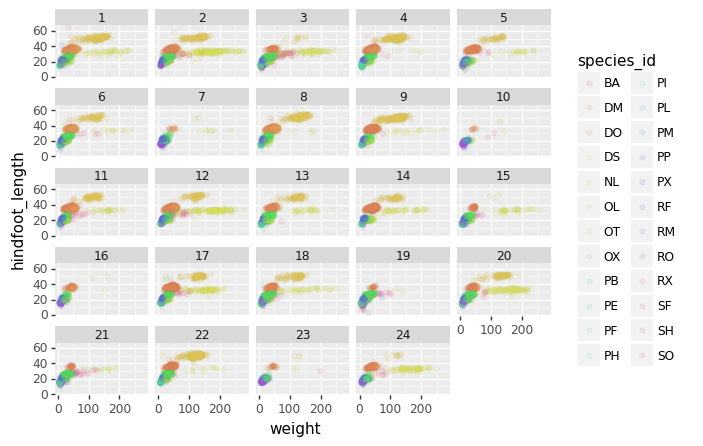

<ggplot: (8785830009329)>

In [8]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("plot_id")
)